# Assignment 6


https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/assignments/MIT18_05S14_ps6.pdf

## Problem 1

250 times (140 heads 110 tails)  
a)  
H0 = ‘probability of heads is 1/2’  
H1 = ‘probability of heads is 140/250'  

$BF = \frac{P(D|H_0)}{P(D|H_1)}$  
$BF = \frac{C_{140}^{250} \cdot 0.5^{140} \cdot 0.5^{110}}{C_{140}^{250} \cdot ({\frac{140}{250}})^{140} \cdot ({\frac{110}{250}})^{110} }$  

In [1]:
0.5**250/((140/250)**140 * (110/250)**110) 

0.16458220998050418

b)  



In [2]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.linspace(0,1, 101)

In [4]:
betas_params = [
    (1, 1), 
    (10, 10), 
    (50, 50), 
    (500, 500), 
    (30,70),
]
betas_curves = {"Beta" + str(params):beta.pdf(x, *params) for params in betas_params} 

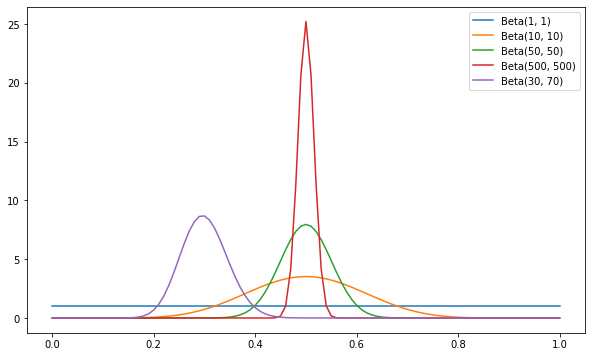

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
for label, values in betas_curves.items():
    ax.plot(x, values, label=label)
ax.legend()

c), d)  

In [6]:
betas_curves_posterior = {"Beta" + str(params):beta.pdf(x, params[0]+140, params[1]+110) for params in betas_params} 

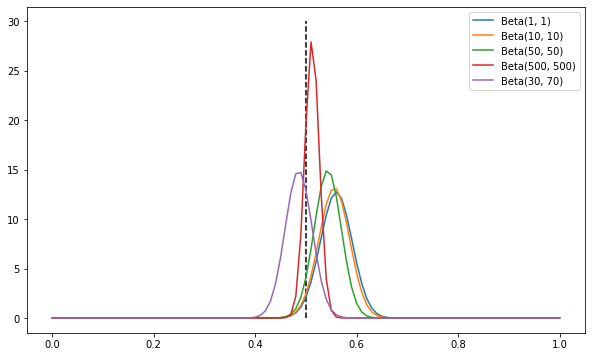

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
for label, values in betas_curves_posterior.items():
    ax.plot(x, values, label=label)
ax.vlines(0.5, 0, 30, linestyles="dashed")
ax.legend();

In [27]:
{"Beta" + str(params):beta.pdf(0.6, params[0]+140, params[1]+110) for params in betas_params} 

{'Beta(1, 1)': 5.584786602542786,
 'Beta(10, 10)': 4.517610922412725,
 'Beta(50, 50)': 1.47760592714259,
 'Beta(500, 500)': 7.454873971415954e-08,
 'Beta(30, 70)': 0.0014001479900057395}

e)  

In [29]:
heads_bias_posterior = {"Beta" + str(params):1 - beta.cdf(0.5, params[0]+140, params[1]+110) for params in betas_params} 
heads_bias_posterior

{'Beta(1, 1)': 0.9709680152424386,
 'Beta(10, 10)': 0.966409803637238,
 'Beta(50, 50)': 0.9459145441453302,
 'Beta(500, 500)': 0.8020181364442633,
 'Beta(30, 70)': 0.29625716575337124}

f)  

In [33]:
h1_bot = 0.55
h1_top = 0.57
h0_bot = 0.49
h0_top = 0.51

In [43]:
p1, p2 = betas_params[0]
print("parameters:", p1, p2)
h1_prob = beta.cdf(h1_top, p1+140, p2+110) - beta.cdf(h1_bot, p1+140, p2+110)
print("h1_prob:", h1_prob)
h0_prob = beta.cdf(h0_top, p1+140, p2+110) - beta.cdf(h0_bot, p1+140, p2+110)
print("h0_prob:", h0_prob)
odds = h1_prob/h0_prob
odds

parameters: 1 1
h1_prob: 0.2506601327655239
h0_prob: 0.04375160970329219


5.729163668843535

In [44]:
p1, p2 = betas_params[3]
print("parameters:", p1, p2)
h1_prob = beta.cdf(h1_top, p1+140, p2+110) - beta.cdf(h1_bot, p1+140, p2+110)
print("h1_prob:", h1_prob)
h0_prob = beta.cdf(h0_top, p1+140, p2+110) - beta.cdf(h0_bot, p1+140, p2+110)
print("h0_prob:", h0_prob)
odds = h1_prob/h0_prob
odds

parameters: 500 500
h1_prob: 0.0035115090885742273
h0_prob: 0.38372012117587967


0.009151224798463756

## Problem 2

Poisson distribution:
$P(X=k) = \frac{\lambda^k}{k!} e ^{-\lambda}$

In [45]:
from scipy.stats import poisson

In [50]:
# pmf(k, mu, loc=0)
l_alice = 10
l_bob = 15
odds_prior = 1/10

In [56]:
1/10 \
*(poisson.pmf(12, l_alice)/poisson.pmf(12, l_bob)) \
*(poisson.pmf(10, l_alice)/poisson.pmf(10, l_bob)) \
*(poisson.pmf(11, l_alice)/poisson.pmf(11, l_bob)) \
*(poisson.pmf(4, l_alice)/poisson.pmf(4, l_bob)) \
*(poisson.pmf(11, l_alice)/poisson.pmf(11, l_bob))

25.408651285242502

## Problem 3

a)

**Prior:**  
$f(\theta)d\theta = 1d\theta$  

**Likelihood:**   
if $ \theta < x$ then $ f(x| \theta) = 0 $  
if $x< \theta< 1 $ then $ f(x| \theta) = \frac{1}{\theta} $  

**Bayes numerator:**  
$f(x| \theta) f(\theta)d\theta = \frac{1}{\theta}d\theta$


**Total**:  
$\int_{x}^{1} \frac{1}{\theta}d\theta = ln(\theta) | _{x}^{1} = ln(1) - ln(x) = -ln(x) $

**Posterior**:  
if $ \theta < x$ then $ f(x| \theta) = 0 $  
if $x< \theta< 1 $ then $ f(x| \theta) = -\frac{1}{ln(x)} \cdot \frac{1}{\theta}d\theta$  


In [64]:
x_1 = 0.2
x_2 = 0.5
theta = np.linspace(0.01,1,101)

In [70]:
y_1_pure = -1/np.log(x_1)*1/theta
y_2_pure = -1/np.log(x_2)*1/theta

y_1 = np.where(theta < x_1, 0, y_1_pure)
y_2 = np.where(theta < x_2, 0, y_2_pure)

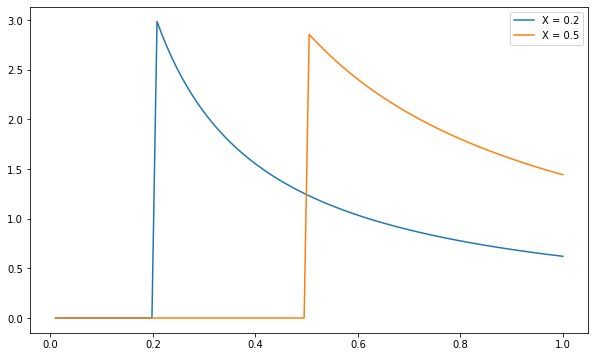

In [72]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.plot(theta, y_1, label=f"X = {x_1}")
ax.plot(theta, y_2, label=f"X = {x_2}")
ax.legend();

In [73]:
-1/np.log(0.2)*1/0.3

2.0711164485320395

b) 

**Likelihood:**  
let $x_M = max(x_1, ..., x_n)$  
if $ \theta < x_M$ then $ f(x_1, ... x_n| \theta) = 0 $  
if $x_M< \theta < 1 $ then $ f(x_1, ... x_n| \theta) = \frac{1}{\theta^n} $  

**Bayes numerator:**  
$f(x| \theta) f(\theta)d\theta = \frac{1}{\theta^n}d\theta$


**Total**:  
$\int_{x_M}^{1} \frac{1}{\theta^n}d\theta = \frac{1}{-n+1}\frac{1}{\theta^{n-1}} | _{x_M}^{1} = \frac{1}{-n+1}(\frac{1}{1^{n-1}} - \frac{1}{{x_M}^{n-1}}) = \frac{1}{1-n}(1 - \frac{1}{{x_M}^{n-1}}) = \frac{{x_M}^{1-n}-1}{n-1}$

**Posterior**:  
if $ \theta < x_M$ then $ f(\theta| x) = 0 $  
if $x_M < \theta< 1 $ then $ f(\theta| x) = \frac{n-1}{{x_M}^{1-n}-1} \frac{1}{\theta^n}d\theta$  



In [78]:
x_1 = (0.1, 0.5)
x_2 = (0.5, 0.5)
x_3 = (0.1, 0.2, 0.3, 0.4, 0.5)

theta = np.linspace(0.01, 1, 101)

y_1_pure = (len(x_1) - 1)/(max(x_1)**(1-len(x_1)) -1)/(theta**(len(x_1)))
y_1 = np.where(theta < max(x_1), 0, y_1_pure)

y_2_pure = (len(x_2) - 1)/(max(x_2)**(1-len(x_2)) -1)/(theta**(len(x_2)))
y_2 = np.where(theta < max(x_2), 0, y_2_pure)

y_3_pure = (len(x_3) - 1)/(max(x_3)**(1-len(x_3)) -1)/(theta**(len(x_3)))
y_3 = np.where(theta < max(x_3), 0, y_3_pure)


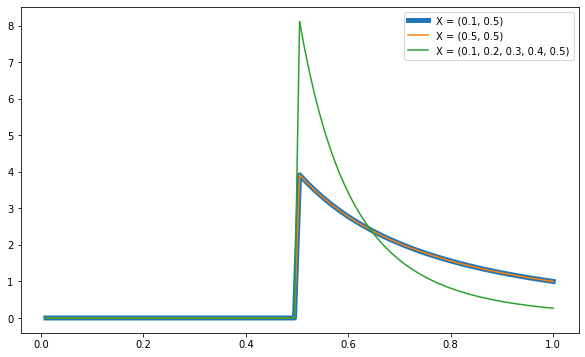

In [82]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.plot(theta, y_1, label=f"X = {x_1}", linewidth=5)  # draw order
ax.plot(theta, y_2, label=f"X = {x_2}")
ax.plot(theta, y_3, label=f"X = {x_3}")
ax.legend();

c)  
n = 5  
x_M = 0.5

**Posterior**: $f(\theta| x_1, ..., x_n)$  
if $ \theta < x_M$ then $ f(\theta| x_1, ..., x_n) = 0 $  
if $x_M < \theta< 1 $ then $ f(\theta| x_1, ..., x_n) = \frac{n-1}{{x_M}^{1-n}-1} \frac{1}{\theta^n}d\theta$  

if $ \theta < 0.5$ then $ f(\theta| x_1, ..., x_n) = 0 $  
if $0.5 < \theta< 1 $ then $ f(\theta| x_1, ..., x_n) = \frac{4}{{0.5}^{-4}-1} \frac{1}{\theta^5}d\theta= \frac{4}{15} \frac{1}{\theta^5}d\theta$  


**Likelihood**: $f(x| \theta)$   
if $ \theta < x_M$ then $ f(x| \theta) = 0 $  
if $x_M < \theta< 1 $ then $ f(x| \theta) = \frac{1}{\theta}$  

**Posterior predictive probablity**: $f(x| x_1, ..., x_n)$  
$f(x| x_1, ..., x_n) = \int f(x| \theta) f(\theta| x_1, ..., x_n)d\theta$   

